### Final end-to-end procedure

We will now run the full conformal procedure, randomly shuffling the data into a calibration and test set, before using the best lambda found on calibration to evaluate using hierarchical loss on test. Lets see how far the test loss diverges from the best lambda's loss (which we know is within our threshold of sampling proteins with at least the same superfamily).

In [2]:
from protein_conformal.util import get_sims_labels, get_thresh_hierarchical, get_hierarchical_loss
import numpy as np
near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)
sims = np.asarray(sims)

# Normalize data using min-max scaling (we assume we don't have )
min_sim, max_sim = min(sims), max(sims)
min_row, max_row = [], []
for query in near_ids:
    query['Norm_S_i'] = (query['S_i'] - min_sim) / (max_sim - min_sim) # normalize each row of S_i
    min_row.append(min(query['Norm_S_i'])) 
    max_row.append(max(query['Norm_S_i']))

    # Now we cumsum the normalized S_i
    query['Sum_Norm_S_i'] = np.cumsum(query['Norm_S_i'])
sims_norm = (sims - min(sims)) / (max(sims) - min(sims))

# Define lambda linspace, NOTE: for now we want to play around with it so we keep it here, can move it to the get_thresh_hierarchical function later.
x = np.linspace(min(min_row)*near_ids[0]['S_i'].shape[0], max(max_row)*near_ids[0]['S_i'].shape[0], near_ids[0]['S_i'].shape[0])

num_trials = 10
alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [2]:
num_trials = 10
alpha = 2 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family and superfamily level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 47.00318083378452
Loss of best lambda: 1.9814648971056037
Trial 1: Lambda: 47.00, Test loss: 1.82
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 51.00345154304278
Loss of best lambda: 1.9878748317831476
Trial 2: Lambda: 51.00, Test loss: 2.03
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 50.00338386572821
Loss of best lambda: 1.9924370855241886
Trial 3: Lambda: 50.00, Test loss: 1.96
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 52.00351922035734
Loss of best lambda: 1.9889176574542284
Trial 4: Lambda: 52.00, Test loss: 2.08
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 48.00324851109909
Loss of best lambda: 1.9892043515001705
Trial 5: Lambda: 48.00, Test loss: 1.85
worst case loss: 3.976855924747919
Loss threshold: 1.9934104802508403
Best lambda: 46.003113156

In [3]:
num_trials = 10
alpha = 3 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family, superfamily and fold level only)
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_loss(test_data, lhat)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 281.01901732539255
Loss of best lambda: 2.996733552292797
Trial 1: Lambda: 281.02, Test loss: 2.99
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 284.0192203573362
Loss of best lambda: 2.995273347815085
Trial 2: Lambda: 284.02, Test loss: 3.01
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 280.018949648078
Loss of best lambda: 2.9961104582926414
Trial 3: Lambda: 280.02, Test loss: 2.98
worst case loss: 3.9766529065439533
Loss threshold: 2.9967444903115203
Best lambda: 262.01773145641585
Loss of best lambda: 2.995654782091469
Trial 4: Lambda: 262.02, Test loss: 2.86
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 279.0188819707634
Loss of best lambda: 2.996095503154845
Trial 5: Lambda: 279.02, Test loss: 2.97
worst case loss: 3.976855924747919
Loss threshold: 2.9967438135841737
Best lambda: 287.01942

In [7]:
x = np.linspace(0, 100, 100) # max family size is ~100, assuming all retrieved proteins are max prob of 1

loss = []
for l in x:
    loss.append(get_hierarchical_loss(near_ids, l))



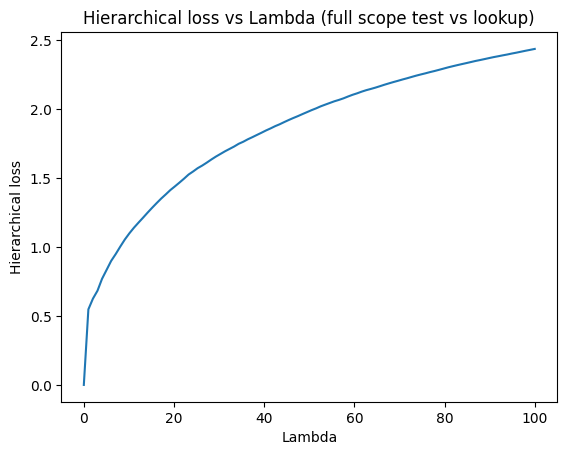

In [10]:
# plot loss vs lambda
import matplotlib.pyplot as plt
plt.plot(x, loss)
plt.xlabel('Lambda')
plt.ylabel('Hierarchical loss')
plt.title('Hierarchical loss vs Lambda (full scope test vs lookup)')
plt.show()


### Try max hierarchical loss
Taking the max over the set of retrieved proteins within our similarity threshold may be better, as it increases monotonically.

In [1]:
from protein_conformal.util import get_sims_labels, get_hierarchical_max_loss, get_thresh_max_hierarchical
import numpy as np
near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

sims, _ = get_sims_labels(near_ids, partial=False)

x = np.linspace(min(sims.flatten()), max(sims.flatten()), 1000)

min(x), max(x)

/home/seyonec/.conda/envs/clean/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(0.9992992877960205, 0.9999949336051941)

In [5]:
loss = []
for l in reversed(x):
    loss.append(get_hierarchical_max_loss(near_ids, l))



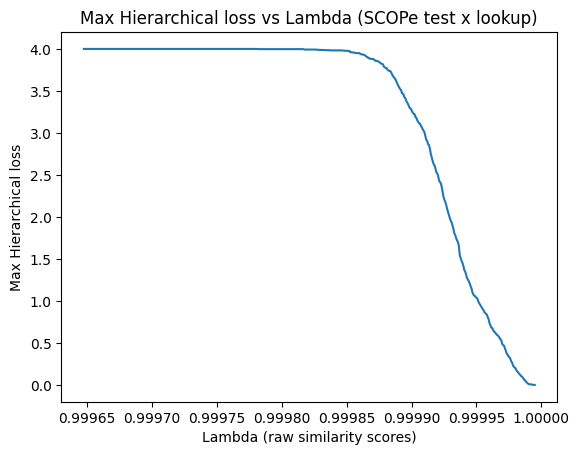

In [17]:
import matplotlib.pyplot as plt
plt.plot(x[500:], loss[::-1][500:])
plt.xlabel('Lambda (raw similarity scores)')
plt.ylabel('Max Hierarchical loss')
plt.title('Max Hierarchical loss vs Lambda (SCOPe test x lookup)')
plt.show()


In [2]:
from protein_conformal.util import *
num_trials = 100
risks = []
losses = []
tprs = []
lhats = []
fdr_cals = []

alpha = 1 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 380 calib, 20 test for DALI prefiltering calibration.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha)
    test_loss = get_hierarchical_max_loss(test_data, lhat)
    X_cal, y_cal = get_sims_labels(cal_data, partial=False)
    X_test, y_test_exact = get_sims_labels(test_data, partial=False)
    
    lhats.append(lhat)
    tprs.append(calculate_true_positives(X_test, y_test_exact, lhat))
    risks.append(risk(X_test, y_test_exact, lhat))

    losses.append(test_loss)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999538494182659
Loss of best lambda: 0.9733333333333334
Trial 1: Lambda: 1.00, Test loss: 0.79
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.98
Trial 2: Lambda: 1.00, Test loss: 0.99
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.9766666666666667
Trial 3: Lambda: 1.00, Test loss: 1.00
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.9633333333333334
Trial 4: Lambda: 1.00, Test loss: 1.04
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.999951760391812
Loss of best lambda: 0.98
Trial 5: Lambda: 1.00, Test loss: 0.99
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999531530761145
Loss of best lambda: 0.9733333333333334
Trial 6: Lambda: 1.00, Test loss: 0.87
worst case loss: 4
Loss threshold: 0.99
Best lambda: 0.9999531530761145
Loss of best lambda: 0.98
Trial 7: Lambda: 1.00, Test 

Text(0.5, 1.0, 'Protein-vec: Histogram of FDRs at SCOPe hierarchical loss alpha=1')

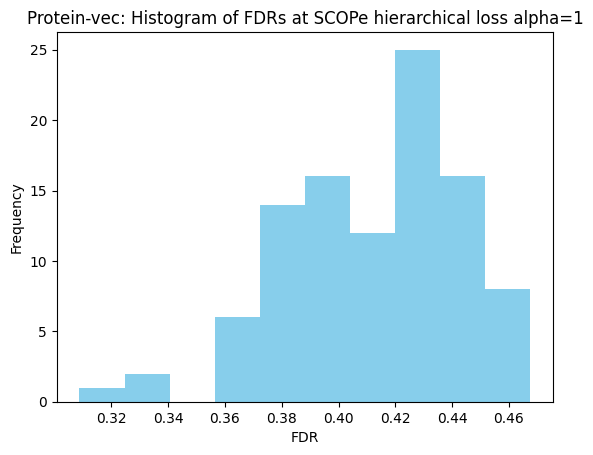

In [18]:
import matplotlib.pyplot as plt
plt.hist(np.array(risks), label='Risk', color='skyblue')
plt.xlabel('FDR')
plt.ylabel('Frequency')
plt.title(f'Protein-vec: Histogram of FDRs at SCOPe hierarchical loss alpha={alpha}')

Text(0.5, 1.0, 'Protein-vec: Histogram of SCOPe Thresholds at hierarchical loss alpha=1')

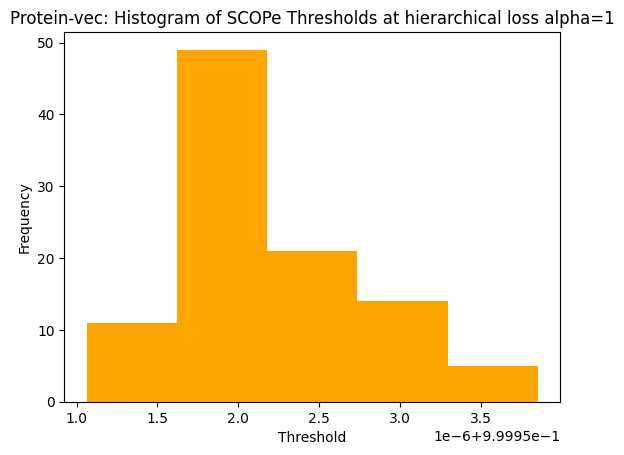

In [32]:
plt.hist(np.array(lhats), bins = 5, label='Lambda', color='orange')
plt.xlabel('Threshold')
plt.ylabel('Frequency')
plt.title(f'Protein-vec: Histogram of SCOPe Thresholds at hierarchical loss alpha={alpha}')

Text(0.5, 1.0, 'Protein-vec: True positive rates at alpha=1')

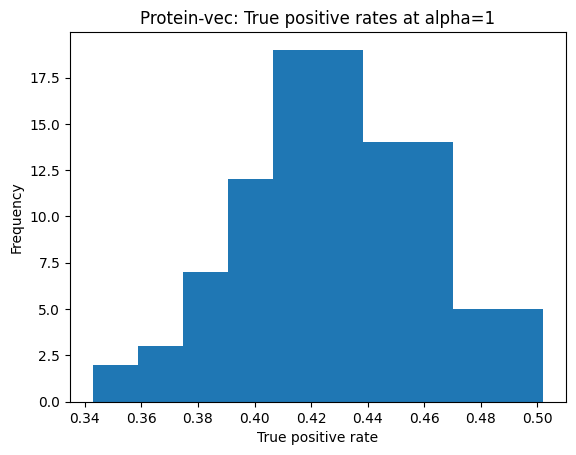

In [33]:
plt.hist(np.array(tprs))
plt.xlabel('True positive rate')
plt.ylabel('Frequency')
plt.title(f'Protein-vec: True positive rates at alpha={alpha}')

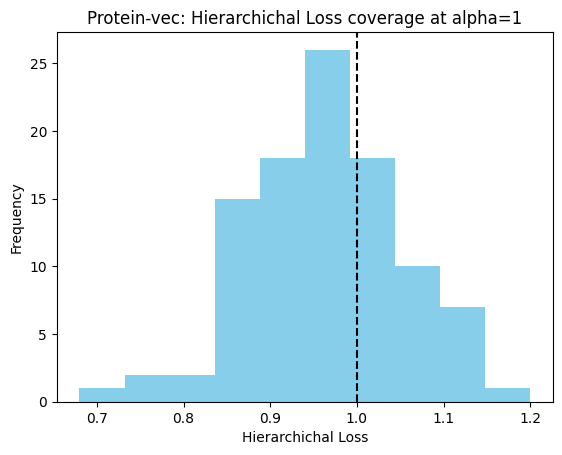

In [23]:
import matplotlib.pyplot as plt
plt.hist(np.array(losses), label="Loss", color="skyblue")
plt.axvline(1, color='black', linestyle='--')
plt.xlabel('Hierarchichal Loss')
plt.ylabel('Frequency')
plt.title(f'Protein-vec: Hierarchichal Loss coverage at alpha={1}')
plt.savefig(f'alpha_{alpha}_risk_histogram.pdf')

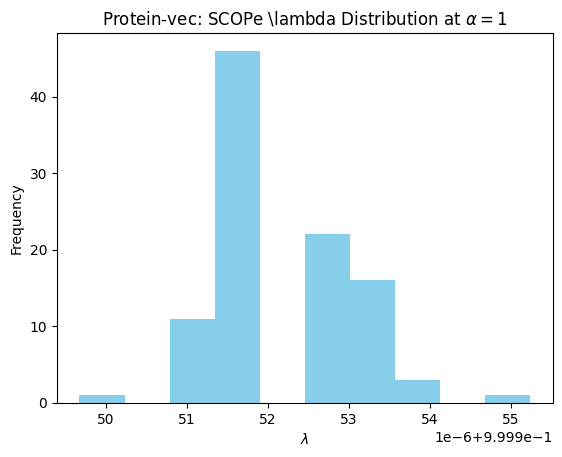

In [24]:
import matplotlib.pyplot as plt

plt.hist(np.array(lhats), label="Loss", color="skyblue")
#plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel(rf'$\lambda$')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: SCOPe \lambda Distribution at $\alpha=${1}')
plt.savefig(f'alpha_{1}_lambda_histogram.pdf')

In [7]:
num_trials = 100
alpha = 2 # max avg. loss we want (on average, each protein retrieved is at most divergent at the family level only)
n_calib = 300 # NOTE: 300 calib, 100 test for reproducing manuscript figures.

lhats_2 = []
losses_2 = []

for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat, _ = get_thresh_max_hierarchical(cal_data, x, alpha)

    test_loss = get_hierarchical_max_loss(test_data, lhat)

    lhats_2.append(lhat)
    losses_2.append(test_loss)

    print(f'Trial {trial+1}: Lambda: {lhat:.2f}, Test loss: {test_loss:.2f}')
    
    #error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    #print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999315664694235
Loss of best lambda: 1.9566666666666668
Trial 1: Lambda: 1.00, Test loss: 1.72
worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999301737851208
Loss of best lambda: 1.9733333333333334
Trial 2: Lambda: 1.00, Test loss: 1.90
worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999294774429696
Loss of best lambda: 1.9833333333333334
Trial 3: Lambda: 1.00, Test loss: 2.00
worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999301737851208
Loss of best lambda: 1.97
Trial 4: Lambda: 1.00, Test loss: 1.91
worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999280847586669
Loss of best lambda: 1.9533333333333334
Trial 5: Lambda: 1.00, Test loss: 2.38
worst case loss: 4
Loss threshold: 1.9933333333333334
Best lambda: 0.9999294774429696
Loss of best lambda: 1.9633333333333334
Trial 6: Lambda: 1.00, Test loss: 2.06
worst case loss: 4
Loss 

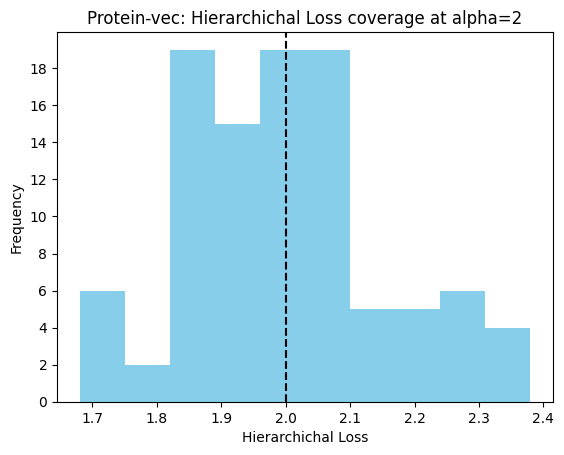

In [25]:
plt.hist(np.array(losses_2), label="Loss", color="skyblue")
plt.axvline(alpha, color='black', linestyle='--')
plt.yticks(np.arange(0, 20, 2))
plt.xlabel('Hierarchichal Loss')
plt.ylabel('Frequency')
plt.title(f'Protein-vec: Hierarchichal Loss coverage at alpha={alpha}')
plt.savefig(f'alpha_{2}_loss_histogram.pdf')

In [10]:
np.mean(losses_2)

1.9944

In [27]:
# store test_losses, lhats
np.save(f'alpha_{1}_test_losses.npy', losses)
np.save(f'alpha_{1}_lhats.npy', lhats)

np.save(f'alpha_{2}_test_losses.npy', losses_2)
np.save(f'alpha_{2}_lhats.npy', lhats_2)

In [28]:
np.mean(losses_2), np.mean(losses)

(1.9944, 0.9649)

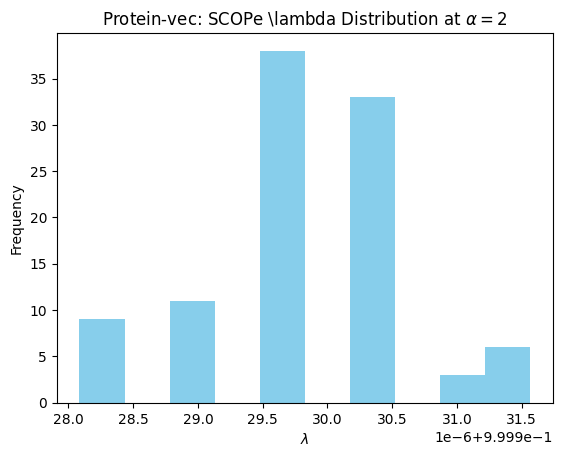

In [26]:
import matplotlib.pyplot as plt

plt.hist(np.array(lhats_2), label="Loss", color="skyblue")
#plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel(rf'$\lambda$')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: SCOPe \lambda Distribution at $\alpha=${alpha}')
plt.savefig(f'alpha_{2}_lambda_histogram.pdf')

# DALI pre-filter calibration procedure

### Controlling FNR

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import ipdb
from sklearn.isotonic import IsotonicRegression
import seaborn as sns
from scipy.stats import binom, norm

from protein_conformal.util import *
data = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

print(len(data))
print(len(data[0]['S_i']))

400
14777


## Look at distribution of S_i across retrieved hits

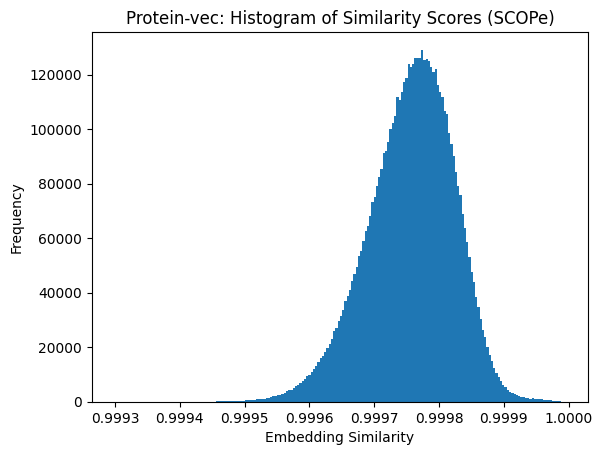

In [2]:
sims = np.stack([query['S_i'] for query in data], axis=0)
plt.hist(sims.flatten(), bins=200)
plt.xlabel('Embedding Similarity')
plt.ylabel('Frequency')
plt.title('Protein-vec: Histogram of Similarity Scores (SCOPe)')
plt.show()

First: FDR on exact hits with SCOPe

In [3]:
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['exact'] for query in data], axis=0)
sims = np.stack([query['S_i'] for query in data], axis=0)

lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# no_empties: as we increase lambda, the number of empty sets increases. We filter out the empty sets and calculate the risk.
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]

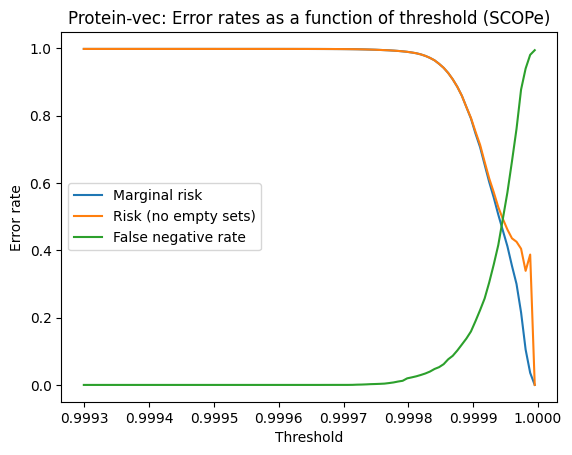

In [4]:
# Plot FDR + FNR as a function of lambda
plt.figure()
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty sets)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='False negative rate')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.title('Protein-vec: Error rates as a function of threshold (SCOPe)')
plt.legend()
plt.show()

### FDR/FNR on partial hits on SCOPe

We define a 'partial' hit as any retrieved homolog that differs at the family level (a hierarchical loss = 1), but still preserving the same superfamily and fold.


In [5]:
# Plot FDR as a function of lambda
sims, labels_partial = get_sims_labels(data, partial=True)
# labels_partial = np.stack([(np.sum(query['partial'], axis=1) >= 1) if len(np.array(query['partial']).shape) > 1 else query['partial'] for query in data], axis=0)
# sims = np.stack([query['S_i'] for query in data], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels_partial, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels_partial, lam) for lam in lambdas]
# no_empties: as we increase lambda, the number of empty sets increases. We filter out the empty sets and calculate the risk.
fnr = [calculate_false_negatives(sims, labels_partial, lam) for lam in lambdas]

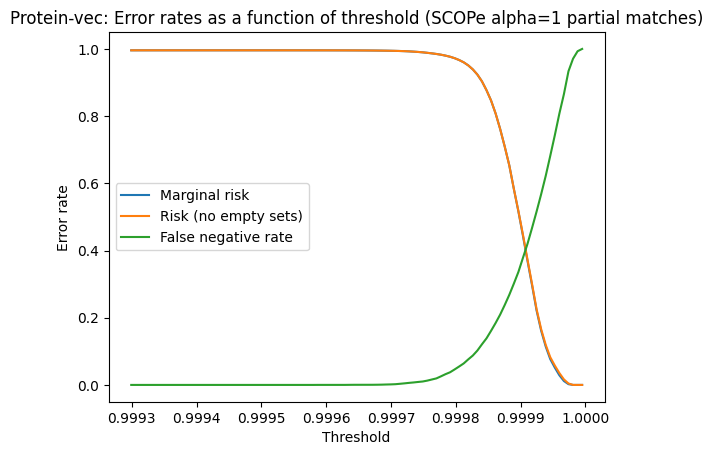

In [6]:
# Plot FDR + FNR as a function of lambda
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty sets)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='False negative rate')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.title('Protein-vec: Error rates as a function of threshold (SCOPe alpha=1 partial matches)')
plt.legend()

### Learn then Test for FNR 

In [37]:
num_trials = 100
alpha = 0.1 ## 10% FNR rate (exact)
n_calib = 380 # NOTE: 380 calib, 20 test for DALI prefiltering calibration.

lmbs = []
errors = []
partial_errors = []
fprs = []

for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]

    X_cal, y_cal = get_sims_labels(cal_data, partial=False)
    X_test, y_test_exact = get_sims_labels(test_data, partial=False)
    _, y_test_partial = get_sims_labels(test_data, partial=True)
    lhat = get_thresh_new(X_cal, y_cal, alpha)

    lmbs.append(lhat)

    error, fraction_inexact, error_partial, fraction_partial, fpr = validate_lhat_new(X_test, y_test_partial, y_test_exact, lhat)
    errors.append(error)
    partial_errors.append(error_partial)
    fprs.append(fpr)

    print(f'Trial {trial+1}: lhat: {lhat}, Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}, FPR&Id/Id: {fpr:.2f}')

# mean and std of lambda
avg_lhat = np.mean(lmbs)
std_lhat = np.std(lmbs)
print(f'Mean exact lambda: {avg_lhat:.8f}, Std lambda: {std_lhat:.8f}')
    

Trial 1: lhat: 0.999861478805542, Ex&!Id/Ex: 0.14, In/Id: 0.95, Pa&!Id/Pa: 0.20, Pa&Id/Id: 0.10, FPR&Id/Id: 0.04
Trial 2: lhat: 0.9998602867126465, Ex&!Id/Ex: 0.10, In/Id: 0.98, Pa&!Id/Pa: 0.40, Pa&Id/Id: 0.05, FPR&Id/Id: 0.05
Trial 3: lhat: 0.999859094619751, Ex&!Id/Ex: 0.02, In/Id: 0.98, Pa&!Id/Pa: 0.13, Pa&Id/Id: 0.06, FPR&Id/Id: 0.05
Trial 4: lhat: 0.9998598098754883, Ex&!Id/Ex: 0.07, In/Id: 0.98, Pa&!Id/Pa: 0.16, Pa&Id/Id: 0.07, FPR&Id/Id: 0.05
Trial 5: lhat: 0.9998608827590942, Ex&!Id/Ex: 0.13, In/Id: 0.97, Pa&!Id/Pa: 0.22, Pa&Id/Id: 0.06, FPR&Id/Id: 0.06
Trial 6: lhat: 0.9998592734336853, Ex&!Id/Ex: 0.02, In/Id: 0.98, Pa&!Id/Pa: 0.10, Pa&Id/Id: 0.06, FPR&Id/Id: 0.05
Trial 7: lhat: 0.9998598098754883, Ex&!Id/Ex: 0.02, In/Id: 0.99, Pa&!Id/Pa: 0.22, Pa&Id/Id: 0.08, FPR&Id/Id: 0.03
Trial 8: lhat: 0.9998593330383301, Ex&!Id/Ex: 0.03, In/Id: 0.98, Pa&!Id/Pa: 0.13, Pa&Id/Id: 0.07, FPR&Id/Id: 0.04
Trial 9: lhat: 0.999860405921936, Ex&!Id/Ex: 0.11, In/Id: 0.96, Pa&!Id/Pa: 0.19, Pa&Id/Id:

Text(0.5, 1.0, 'Protein-vec: FNR coverage at FNR $\\alpha = 0.1$')

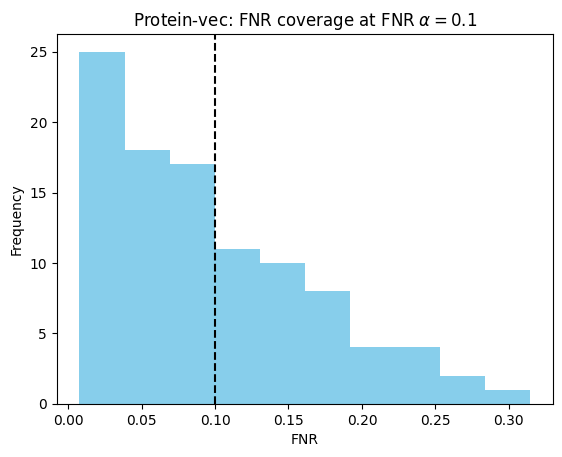

In [50]:
plt.hist(np.array(errors), label="FNR", color="skyblue")
plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel('FNR')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: FNR coverage at FNR $\alpha = {.1}$')

Text(0.5, 1.0, 'Protein-vec: Partial ($hierarchical\\_loss = 1$) FNR coverage at $\\alpha = 0.1$')

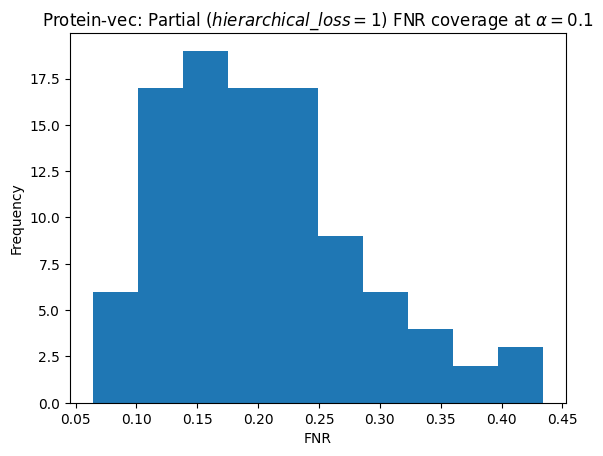

In [49]:
plt.hist(np.array(partial_errors), label="FNR")
#plt.axvline(alpha, color='black', linestyle='--')
plt.xlabel('FNR')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: Partial ($hierarchical\_loss = 1$) FNR coverage at $\alpha = {.1}$')


Text(0.5, 1.0, 'Protein-vec: False positive rates at FNR $\\alpha = 0.1$')

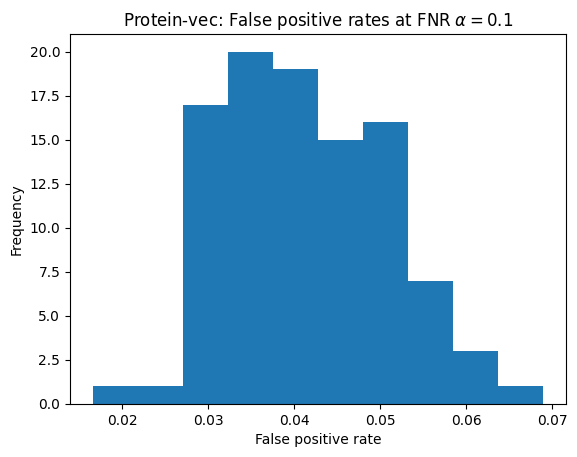

In [55]:
plt.hist(np.array(fprs), label="FPR")
plt.xlabel('False positive rate')
plt.ylabel('Frequency')
plt.title(rf'Protein-vec: False positive rates at FNR $\alpha = {.1}$')

In [33]:
num_trials = 10
alpha = 0.05 ## 5% FNR rate (exact)
n_calib = 380 # NOTE: 380 calib, 20 test for DALI prefiltering calibration.

lmbs = []

for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]

    X_cal, y_cal = get_sims_labels(cal_data, partial=False)
    X_test, y_test_exact = get_sims_labels(test_data, partial=False)
    _, y_test_partial = get_sims_labels(test_data, partial=True)
    lhat = get_thresh_new(X_cal, y_cal, alpha)

    lmbs.append(lhat)

    error, fraction_inexact, error_partial, fraction_partial, fpr = validate_lhat_new(X_test, y_test_partial, y_test_exact, lhat)
    print(f'Trial {trial+1}: lhat: {lhat}, Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}, FPR&Id/Id: {fpr:.2f}')

# mean and std of lambda
avg_lhat = np.mean(lmbs)
std_lhat = np.std(lmbs)
print(f'Mean exact lambda: {avg_lhat:.8f}, Std lambda: {std_lhat:.8f}')
    

Trial 1: lhat: 0.9998306035995483, Ex&!Id/Ex: 0.03, In/Id: 0.99, Pa&!Id/Pa: 0.27, Pa&Id/Id: 0.06, FPR&Id/Id: 0.15
Trial 2: lhat: 0.9998315572738647, Ex&!Id/Ex: 0.03, In/Id: 0.99, Pa&!Id/Pa: 0.25, Pa&Id/Id: 0.06, FPR&Id/Id: 0.12
Trial 3: lhat: 0.999833345413208, Ex&!Id/Ex: 0.09, In/Id: 0.99, Pa&!Id/Pa: 0.68, Pa&Id/Id: 0.04, FPR&Id/Id: 0.10
Trial 4: lhat: 0.9998385906219482, Ex&!Id/Ex: 0.15, In/Id: 0.98, Pa&!Id/Pa: 0.42, Pa&Id/Id: 0.16, FPR&Id/Id: 0.07
Trial 5: lhat: 0.9998306035995483, Ex&!Id/Ex: 0.02, In/Id: 0.99, Pa&!Id/Pa: 0.32, Pa&Id/Id: 0.06, FPR&Id/Id: 0.12
Trial 6: lhat: 0.9998303651809692, Ex&!Id/Ex: 0.01, In/Id: 0.99, Pa&!Id/Pa: 0.35, Pa&Id/Id: 0.04, FPR&Id/Id: 0.16
Trial 7: lhat: 0.9998372197151184, Ex&!Id/Ex: 0.15, In/Id: 0.98, Pa&!Id/Pa: 0.37, Pa&Id/Id: 0.09, FPR&Id/Id: 0.09
Trial 8: lhat: 0.9998323917388916, Ex&!Id/Ex: 0.05, In/Id: 0.99, Pa&!Id/Pa: 0.36, Pa&Id/Id: 0.06, FPR&Id/Id: 0.14
Trial 9: lhat: 0.9998350143432617, Ex&!Id/Ex: 0.11, In/Id: 0.99, Pa&!Id/Pa: 0.35, Pa&Id/I

### We want to control FNR at the partial level now, instead of exact matches
Why: be more tolerant to capture more hits at the cost of retrieving more homologs that don't match at family-level.

In [21]:
num_trials = 10
alpha = 0.01 ## 1% FNR rate (partial)
n_calib = 380 # NOTE: 380 calib, 20 test for DALI prefiltering calibration.
lmbs = []
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]

    X_cal, y_cal = get_sims_labels(cal_data, partial=True)
    X_test, y_test_exact = get_sims_labels(test_data, partial=True)
    _, y_test_partial = get_sims_labels(test_data, partial=True)
    lhat = get_thresh_new(X_cal, y_cal, alpha)

    lmbs.append(lhat)
    
    error, fraction_inexact, error_partial, fraction_partial, fpr = validate_lhat_new(X_test, y_test_partial, y_test_exact, lhat)
    print("FNR for {alpha} threshold finder, on partial matches".format(alpha=alpha))
    print(f'Trial {trial+1}: lhat: {lhat}, Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}, FPR&Id/Id: {fpr:.2f}')

# mean and std of lambda
avg_lhat = np.mean(lmbs)
std_lhat = np.std(lmbs)
print(f'Mean partial lambda: {avg_lhat:.8f}, Std lambda: {std_lhat:.8f}')
    
    

FNR for 0.01 threshold finder, on partial matches
Trial 1: lhat: 0.9997458457946777, Ex&!Id/Ex: 0.00, In/Id: 0.99, Pa&!Id/Pa: 0.00, Pa&Id/Id: 0.01, FPR&Id/Id: 0.62
FNR for 0.01 threshold finder, on partial matches
Trial 2: lhat: 0.9997483491897583, Ex&!Id/Ex: 0.01, In/Id: 0.99, Pa&!Id/Pa: 0.01, Pa&Id/Id: 0.01, FPR&Id/Id: 0.57
FNR for 0.01 threshold finder, on partial matches
Trial 3: lhat: 0.9997519254684448, Ex&!Id/Ex: 0.03, In/Id: 0.99, Pa&!Id/Pa: 0.03, Pa&Id/Id: 0.01, FPR&Id/Id: 0.55
FNR for 0.01 threshold finder, on partial matches
Trial 4: lhat: 0.9997491240501404, Ex&!Id/Ex: 0.02, In/Id: 0.99, Pa&!Id/Pa: 0.02, Pa&Id/Id: 0.01, FPR&Id/Id: 0.63
FNR for 0.01 threshold finder, on partial matches
Trial 5: lhat: 0.9997466206550598, Ex&!Id/Ex: 0.00, In/Id: 0.99, Pa&!Id/Pa: 0.00, Pa&Id/Id: 0.01, FPR&Id/Id: 0.62
FNR for 0.01 threshold finder, on partial matches
Trial 6: lhat: 0.9997477531433105, Ex&!Id/Ex: 0.01, In/Id: 0.99, Pa&!Id/Pa: 0.01, Pa&Id/Id: 0.01, FPR&Id/Id: 0.54
FNR for 0.01 thr

### Controlling FNR at the higher levels of structural hierarchy

Say we want to find a filter that may absorb a higher FPR rate for low DALI z-scores, but we wish to ensure that we have as low of a FNR rate for DALI z-scores > 6 (the "ELBO" point for DALI z-scores greater than 0). To do so, we will simply calibrate on a higher SCOPe hierarchy, considering partial matches as ones that diverge at the family and superfamily level, but preserve fold-level homology (hierarchical loss of 2). We will apply the LTT calibration procedure to minimize FNR on these matches.

In [31]:
# Re-write "partial" mask as for l <=2 for l in query['loss'] 
data = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)

for query in data:
    query['partial'] = [l <= 2 for l in query['loss']]


num_trials = 10
alpha = 0.01 # 1% 1% FNR rate (partial fold-level matches)
n_calib = 380 # NOTE: 380 calib, 20 test for DALI prefiltering calibration.
lmbs = []
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(data)
    cal_data = data[:n_calib]
    test_data = data[n_calib:]

    X_cal, y_cal = get_sims_labels(cal_data, partial=True)
    X_test, y_test_exact = get_sims_labels(test_data, partial=True)
    _, y_test_partial = get_sims_labels(test_data, partial=True)
    lhat = get_thresh_new(X_cal, y_cal, alpha)

    lmbs.append(lhat)
    
    error, fraction_inexact, error_partial, fraction_partial, fpr = validate_lhat_new(X_test, y_test_partial, y_test_exact, lhat)
    print("FNR for {alpha} threshold finder, on partial fold-level matches".format(alpha=alpha))
    print(f'Trial {trial+1}: lhat: {lhat}, Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}, FPR&Id/Id: {fpr:.2f}')

# mean and std of lambda
avg_lhat = np.mean(lmbs)
std_lhat = np.std(lmbs)
print(f'Mean partial lambda: {avg_lhat:.8f}, Std lambda: {std_lhat:.8f}')

FNR for 0.01 threshold finder, on partial fold-level matches
Trial 1: lhat: 0.999674916267395, Ex&!Id/Ex: 0.00, In/Id: 0.98, Pa&!Id/Pa: 0.00, Pa&Id/Id: 0.02, FPR&Id/Id: 0.90
FNR for 0.01 threshold finder, on partial fold-level matches
Trial 2: lhat: 0.9996756315231323, Ex&!Id/Ex: 0.00, In/Id: 0.98, Pa&!Id/Pa: 0.00, Pa&Id/Id: 0.02, FPR&Id/Id: 0.91
FNR for 0.01 threshold finder, on partial fold-level matches
Trial 3: lhat: 0.9996768236160278, Ex&!Id/Ex: 0.01, In/Id: 0.98, Pa&!Id/Pa: 0.01, Pa&Id/Id: 0.02, FPR&Id/Id: 0.91
FNR for 0.01 threshold finder, on partial fold-level matches
Trial 4: lhat: 0.9996770620346069, Ex&!Id/Ex: 0.01, In/Id: 0.98, Pa&!Id/Pa: 0.01, Pa&Id/Id: 0.02, FPR&Id/Id: 0.84
FNR for 0.01 threshold finder, on partial fold-level matches
Trial 5: lhat: 0.999678373336792, Ex&!Id/Ex: 0.02, In/Id: 0.98, Pa&!Id/Pa: 0.02, Pa&Id/Id: 0.02, FPR&Id/Id: 0.83
FNR for 0.01 threshold finder, on partial fold-level matches
Trial 6: lhat: 0.9996758699417114, Ex&!Id/Ex: 0.00, In/Id: 0.99, P

In [32]:
avg_lhat

0.9996764